# Basic practice with Python and `numpy`

We will manually construct a confusion matrix and calculate various defined measures.

This follows the description of conusion matrix in https://en.wikipedia.org/wiki/Confusion_matrix

**1**. Get the `Actual Classification` and `Predicted Classification` values from the Wikipedia page into `numpy` arrays called ``y_true` and `y_pred` respectively.

y_true should look like this
```python
array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
```

#### Method 1: Manual construction

In [1]:
import numpy as np

In [2]:
y_true = np.array([1,1,1,1,1,1,1,1,0,0,0,0])
y_pred = np.array([0,0,1,1,1,1,1,1,1,0,0,0])

In [3]:
y_true

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [4]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

####  Method 2: Using `pandas` table-scraping

In [5]:
import pandas as pd

In [6]:
tables = pd.read_html('https://en.wikipedia.org/wiki/Confusion_matrix')

In [7]:
y_true = tables[2].iloc[0, 1:].astype('int').values
y_pred = tables[2].iloc[1, 1:].astype('int').values

In [8]:
y_true

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [9]:
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

**2**. Construct the 2 $\times$ 2 confusion matrix from `y_true` and `y_pred` where the rows are the actual classificaiton and the columns are the predicted classificaiton. From Wikipedia, it should look like this:

```python
array([[6, 2],
       [1, 3]])
```

In [10]:
cm = np.zeros((2,2), dtype='int')
cm[0,0] = np.sum((y_true == 1) & (y_pred == 1))
cm[0,1] = np.sum((y_true == 1) & (y_pred == 0))
cm[1,0] = np.sum((y_true == 0) & (y_pred == 1))
cm[1,1] = np.sum((y_true == 0) & (y_pred == 0))

In [11]:
cm

array([[6, 2],
       [1, 3]])

**3**. Write functions to calculate the value of some of the terms in the `Terminology and derivations from a confusion matrix` table on Wikipedia. The funciton should take a $2 \times 2$ conusion marix defined as in exercise **2** as input. If there are multiple synonmys for the value, just choose one for the function name.

Do this for

- Type I error
- Type II error
- sensitivity
- specificity
- negative predictive value (NPV)
- positive predictive value (PPV)
- false discovery rate (FDR)
- accuracy (ACC)
- F1 score
- Matthews correlation coefficient (MCC)

For example, if `M` is the confusin matrix, then `sensitivity(M)` shoudl return `0.75`.


In [12]:
def sensitivity(C):
    """Sensitivity, also  known as recall, hit rate, or true positive rate (TPR)"""

    TP = C[0,0]
    FN = C[0,1]
    FP = C[1,0]
    TN = C[1,1]

    return TP/(TP + FN)

In [13]:
sensitivity(cm)

0.75

**4**. Compare the results of your Matthews correlation coefficient (MCC) with the `matthews_corrcoef` function from `scikit-learn`. Do this for all the other terms as wel.

In [14]:
from sklearn.metrics import matthews_corrcoef

In [15]:
matthews_corrcoef(y_true, y_pred)

0.47809144373375745

**5**. Create a confusion matrix viaulzation that looks like this using `ConfusionMatrixDisplay` form `scikit-learn`.
 
![img](cm.png)

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

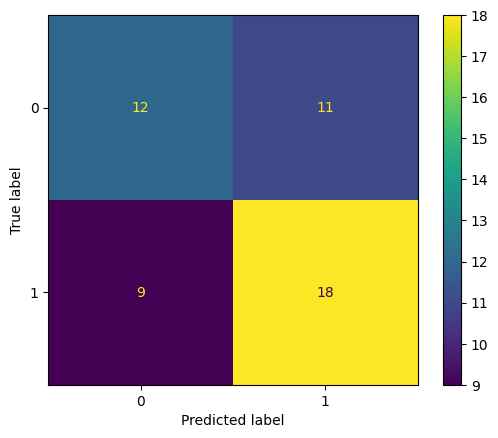

In [22]:
ConfusionMatrixDisplay.from_predictions(y_true, y_pred);

**6**. Set the ranom number seed to 42. Now create random vectors of 50 zeros and ones for y_true and y_pred. Repat exersie 4 and 5 for these vectors.

In [18]:
np.random.seed(42)

In [19]:
y_true = np.random.randint(0, 2, 50)
y_pred = np.random.randint(0, 2, 50)

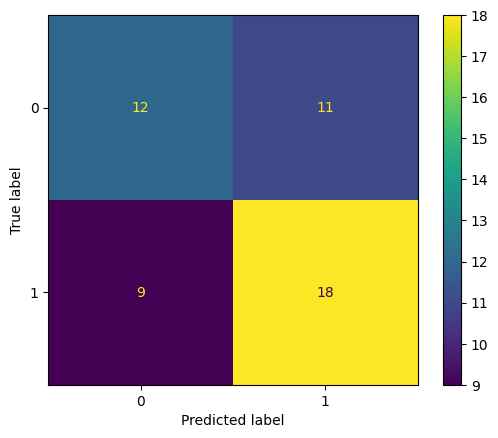

In [20]:
ConfusionMatrixDisplay.from_predictions(y_true, y_pred);

In [21]:
matthews_corrcoef(y_true, y_pred)

0.19025295692965058